In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("dataset_preprocessed.csv")

In [3]:
data.head()

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_GEO,Orbit_GTO,...,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc
0,6104.959412,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PayloadMass               90 non-null     float64
 1   Flights                   90 non-null     int64  
 2   GridFins                  90 non-null     int64  
 3   Reused                    90 non-null     int64  
 4   Legs                      90 non-null     int64  
 5   Block                     90 non-null     float64
 6   ReusedCount               90 non-null     int64  
 7   Class                     90 non-null     int64  
 8   Orbit_GEO                 90 non-null     int64  
 9   Orbit_GTO                 90 non-null     int64  
 10  Orbit_HEO                 90 non-null     int64  
 11  Orbit_ISS                 90 non-null     int64  
 12  Orbit_LEO                 90 non-null     int64  
 13  Orbit_MEO                 90 non-null     int64  
 14  Orbit_PO    

## input and target

In [5]:
x = data.drop(["Class"], axis= 1)
y = data["Class"]

## scaling data

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Train Test split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x_scaled, y, test_size= 0.3, random_state= 101)

## ML Algorithm

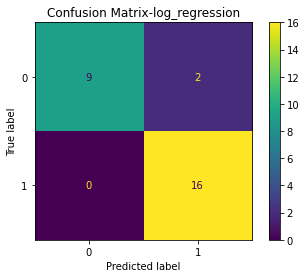

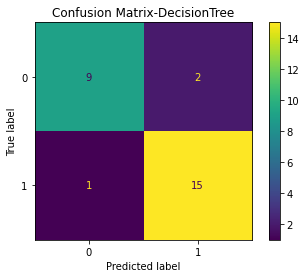

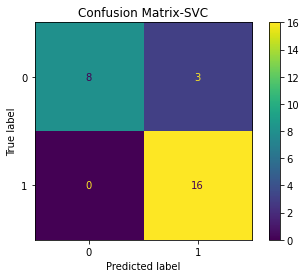

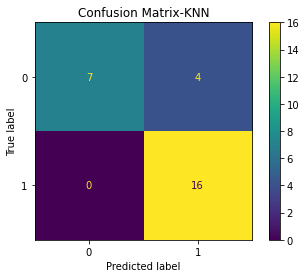

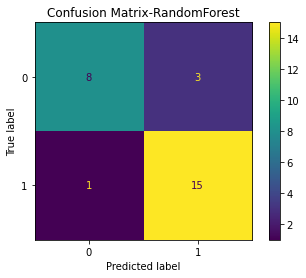

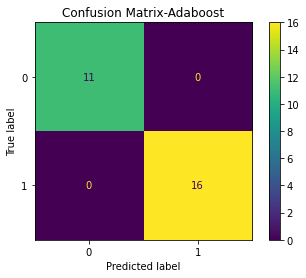

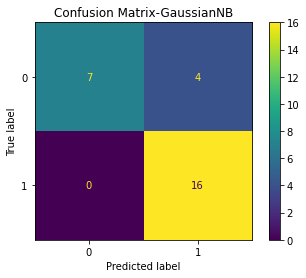

In [8]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gnb = GaussianNB()

clf = [logreg, tree, svm, knn, rf, adb, gnb]

parameters_logreg = {'C':[0.01,0.001,0.1, 1, 10]}
parameters_tree ={'criterion': ["gini", "entropy"], 'min_samples_split':[2, 4 ,6], 'min_samples_leaf':[1, 3, 5] }
parameters_svm = {'kernel':['linear', 'rbf' ,'sigmoid'], 'C':[0.1, 1, 10], 'gamma' : [0.001, 0.01, 1] }
parameters_knn = { 'n_neighbors': [5, 10, 15], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1,2] }
parameters_rf = {'n_estimators':[50,100, 150], 'min_samples_split':[2, 4 ,6], 'min_samples_leaf':[1, 3, 5]}
parameters_adb = {'n_estimators':[30,50, 80], 'learning_rate':[0.7, 1]}
parameters_gnb ={}

parameters = [parameters_logreg, parameters_tree, parameters_svm, parameters_knn, parameters_rf, parameters_adb, parameters_gnb]
keys = ["log_regression", "DecisionTree", "SVC", "KNN", "RandomForest", "Adaboost", "GaussianNB"]

best_params = []
accuracy = []


for i in range(7):
    clf_cv = GridSearchCV(clf[i], parameters[i], refit= True)
    clf_cv.fit(x_train, y_train)
    best_params.append(clf_cv.best_params_)
    accuracy.append(clf_cv.score(x_test, y_test))
    
    ConfusionMatrixDisplay.from_estimator(clf_cv, x_test, y_test)
    plt.title(f"Confusion Matrix-{keys[i]}")
    plt.show()
     


In [9]:
accuracy_dict = dict(zip(keys, accuracy))

print(f"accuracy for each model: \n {accuracy_dict}") 

accuracy for each model: 
 {'log_regression': 0.9259259259259259, 'DecisionTree': 0.8888888888888888, 'SVC': 0.8888888888888888, 'KNN': 0.8518518518518519, 'RandomForest': 0.8518518518518519, 'Adaboost': 1.0, 'GaussianNB': 0.8518518518518519}


In [10]:
best_parameters_dict = dict(zip(keys, best_params))
print(f"tuned parameters for each model: \n {best_parameters_dict}") 

tuned parameters for each model: 
 {'log_regression': {'C': 10}, 'DecisionTree': {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}, 'SVC': {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}, 'KNN': {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}, 'RandomForest': {'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}, 'Adaboost': {'learning_rate': 0.7, 'n_estimators': 30}, 'GaussianNB': {}}


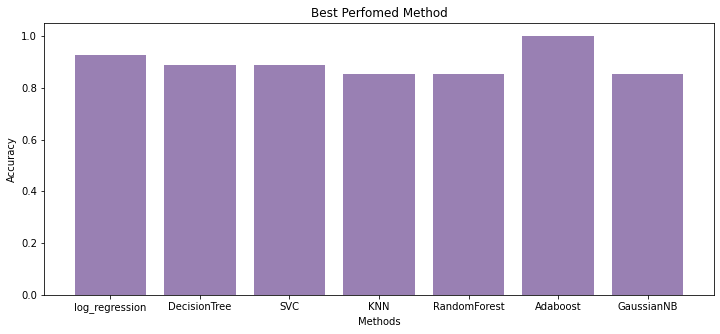

In [11]:
plt.figure(figsize=(12,5))
plt.bar(keys,accuracy, color =(0.6, 0.5, 0.7))
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

## save and load the best Model using pickle

In [12]:
import pickle

logreg_cv = GridSearchCV(clf[0], parameters[0])
logreg_cv.fit(x_train, y_train)

with open ("model_1.pkl" , "wb") as file:
    pickle.dump(logreg_cv, file)

In [13]:
import pickle

Adaboost_cv = GridSearchCV(clf[5], parameters[5])
Adaboost_cv.fit(x_train, y_train)

with open ("model_2.pkl" , "wb") as file:
    pickle.dump(Adaboost_cv, file)

## Receiver Operating Characteristic (ROC) Curve

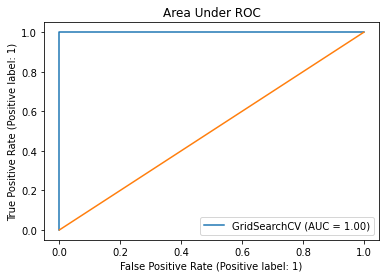

In [14]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(Adaboost_cv, x_test, y_test)
plt.plot([0,1], [0,1])
plt.title('Area Under ROC')
plt.show()

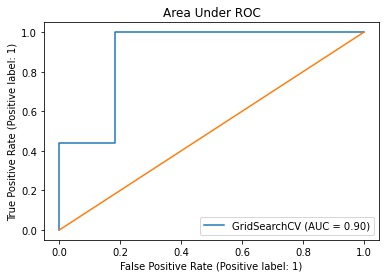

In [15]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg_cv, x_test, y_test)
plt.plot([0,1], [0,1])
plt.title('Area Under ROC')
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, logreg_cv.predict(x_test))

0.9090909090909091

In [25]:
roc_auc_score(y_test, logreg_cv.predict_proba(x_test)[:, 1])

0.8977272727272727